In [1]:
import generate_datasets as ds
from MNIST_functions import *
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Generate permuted and rotated tasks 
permuted_train_loaders, permuted_test_loaders, rotated_train_loaders, rotated_test_loaders = ds.load_datasets(num_tasks_permute=10, num_tasks_rotate=10)

In [3]:
#Run experiment 2A for permutated MNIST on 3 tasks

epoch_accuracies_SGD, epoch_accuracies_EWC, epoch_accuracies_L2 = run_experiment_2A( permuted_train_loaders[0:3], permuted_test_loaders[0:3])

Learning rate: 0.001, Dropout input: 0.0, Dropout hidden: 0.0, Early stopping: False, Num hidden layers: 2, Width hidden layers: 400, Epochs: 3
Epoch 1/3, Accuracy on test set 0: 0.9380
Epoch 2/3, Accuracy on test set 0: 0.9552
Epoch 3/3, Accuracy on test set 0: 0.9609


Epoch 1/3, Accuracy on test set 0: 0.9361
Epoch 1/3, Accuracy on test set 1: 0.9362
Epoch 2/3, Accuracy on test set 0: 0.9251
Epoch 2/3, Accuracy on test set 1: 0.9521
Epoch 3/3, Accuracy on test set 0: 0.9291
Epoch 3/3, Accuracy on test set 1: 0.9579


Epoch 1/3, Accuracy on test set 0: 0.8819
Epoch 1/3, Accuracy on test set 1: 0.9352
Epoch 1/3, Accuracy on test set 2: 0.9417
Epoch 2/3, Accuracy on test set 0: 0.8731
Epoch 2/3, Accuracy on test set 1: 0.9261
Epoch 2/3, Accuracy on test set 2: 0.9538
Epoch 3/3, Accuracy on test set 0: 0.8498
Epoch 3/3, Accuracy on test set 1: 0.9142
Epoch 3/3, Accuracy on test set 2: 0.9568


{0: {0: [0.938, 0.9552, 0.9609]}, 1: {0: [0.9361, 0.9251, 0.9291], 1: [0.9362, 0.9521, 0.9579]

In [ ]:
#Plot results for experiment 2A on permutated MNIST

sgd_A = [epoch_accuracies_SGD[0][0], epoch_accuracies_SGD[1][0], epoch_accuracies_SGD[2][0]]
ewc_A = [epoch_accuracies_EWC[0][0], epoch_accuracies_EWC[1][0], epoch_accuracies_EWC[2][0]]
l2_A = [epoch_accuracies_L2[0][0], epoch_accuracies_L2[1][0], epoch_accuracies_L2[2][0]]

sgd_B = [epoch_accuracies_SGD[1][1], epoch_accuracies_SGD[2][1]]
ewc_B = [epoch_accuracies_EWC[1][1], epoch_accuracies_EWC[2][1]]
l2_B = [epoch_accuracies_L2[1][1], epoch_accuracies_L2[2][1]]

sgd_C = [epoch_accuracies_SGD[2][2]]
ewc_C = [epoch_accuracies_EWC[2][2]]
l2_C = [epoch_accuracies_L2[2][2]]

# Flatten each list (SGD, EWC, L2) into a single list of accuracies for each task
sgd_A_flat = [item for sublist in sgd_A for item in sublist]
ewc_A_flat = [item for sublist in ewc_A for item in sublist]
l2_A_flat = [item for sublist in l2_A for item in sublist]

sgd_B_flat = [item for sublist in sgd_B for item in sublist]
ewc_B_flat = [item for sublist in ewc_B for item in sublist]
l2_B_flat = [item for sublist in l2_B for item in sublist]

sgd_C_flat = [item for sublist in sgd_C for item in sublist]
ewc_C_flat = [item for sublist in ewc_C for item in sublist]
l2_C_flat = [item for sublist in l2_C for item in sublist]

# Create time arrays for the x-axis 
max_len_A = len(sgd_A_flat)  # The total number of points for Task A
time_A = np.arange(max_len_A)

# Task B and C - create time arrays based on the available epochs
max_len_B = len(sgd_B_flat)
time_B = np.arange(max_len_B)

max_len_C = len(sgd_C_flat)
time_C = np.arange(max_len_C)

# Padding with NaNs for Task B (before the last 40 epochs) and Task C (before the last 20 epochs)
sgd_B_padded = [np.nan] * (max_len_A - max_len_B) + sgd_B_flat
ewc_B_padded = [np.nan] * (max_len_A - max_len_B) + ewc_B_flat
l2_B_padded = [np.nan] * (max_len_A - max_len_B) + l2_B_flat

sgd_C_padded = [np.nan] * (max_len_A - max_len_C) + sgd_C_flat
ewc_C_padded = [np.nan] * (max_len_A - max_len_C) + ewc_C_flat
l2_C_padded = [np.nan] * (max_len_A - max_len_C) + l2_C_flat

# Adjust time arrays for Task B and C based on the length of padded data
time_B_padded = np.arange(len(sgd_B_padded))
time_C_padded = np.arange(len(sgd_C_padded))

# Set up subplots (3 rows, 1 column)
fig, axes = plt.subplots(3, 1, figsize=(10, 6), sharex=True)

# Colors for the methods
colors = {'ewc': 'red', 'l2': 'green', 'sgd': 'blue'}

# Plot Task A
axes[0].plot(time_A, sgd_A_flat, label="SGD", color=colors['sgd'], alpha=0.8)
axes[0].plot(time_A, ewc_A_flat, label="EWC", color=colors['ewc'], alpha=0.8)
axes[0].plot(time_A, l2_A_flat, label="L2", color=colors['l2'], alpha=0.8)
axes[0].axvline(x=19, color='gray', linestyle='--', linewidth=1)
axes[0].axvline(x=39, color='gray', linestyle='--', linewidth=1)
axes[0].set_ylabel("Task A")
axes[0].set_ylim(0.8, 1)
axes[0].legend(loc="lower left")
axes[0].text(10, 1.01, "Training A", ha='center', va='bottom', fontsize=12)
axes[0].text(30, 1.01, "Training B", ha='center', va='bottom', fontsize=12)
axes[0].text(50, 1.01, "Training C", ha='center', va='bottom', fontsize=12)

# Plot Task B
axes[1].plot(time_B_padded, sgd_B_padded, label="SGD", color=colors['sgd'], alpha=0.8)
axes[1].plot(time_B_padded, ewc_B_padded, label="EWC", color=colors['ewc'], alpha=0.8)
axes[1].plot(time_B_padded, l2_B_padded, label="L2", color=colors['l2'], alpha=0.8)
axes[1].axvline(x=19, color='gray', linestyle='--', linewidth=1)
axes[1].axvline(x=39, color='gray', linestyle='--', linewidth=1)
axes[1].set_ylabel("Task B")
axes[1].set_ylim(0.8, 1)
axes[1].legend(loc="lower left")

# Plot Task C
axes[2].plot(time_C_padded, sgd_C_padded, label="SGD", color=colors['sgd'], alpha=0.8)
axes[2].plot(time_C_padded, ewc_C_padded, label="EWC", color=colors['ewc'], alpha=0.8)
axes[2].plot(time_C_padded, l2_C_padded, label="L2", color=colors['l2'], alpha=0.8)
axes[2].axvline(x=19, color='gray', linestyle='--', linewidth=1)
axes[2].axvline(x=39, color='gray', linestyle='--', linewidth=1)
axes[2].set_xlabel("Training time")
axes[2].set_ylabel("Task C")
axes[2].set_ylim(0.8, 1)
axes[2].legend(loc="lower left")

# Show the plot
plt.tight_layout()
plt.show()

Trial 1/1: Learning rate=0.00009, Hidden layer width=1044
Training on Task 1
Task 1, Epoch 1/10, SGD Loss: 0.0010
Task 1, Epoch 1/10, EWC Loss: 0.0009
Task 1, Epoch 2/10, SGD Loss: 0.0011
Task 1, Epoch 2/10, EWC Loss: 0.0007
Task 1, Epoch 3/10, SGD Loss: 0.0009
Task 1, Epoch 3/10, EWC Loss: 0.0011
Task 1, Epoch 4/10, SGD Loss: 0.0007
Task 1, Epoch 4/10, EWC Loss: 0.0005
Task 1, Epoch 5/10, SGD Loss: 0.0006
Task 1, Epoch 5/10, EWC Loss: 0.0004
Task 1, Epoch 6/10, SGD Loss: 0.0004
Task 1, Epoch 6/10, EWC Loss: 0.0004
Task 1, Epoch 7/10, SGD Loss: 0.0002
Task 1, Epoch 7/10, EWC Loss: 0.0004
Task 1, Epoch 8/10, SGD Loss: 0.0007
Task 1, Epoch 8/10, EWC Loss: 0.0011
Task 1, Epoch 9/10, SGD Loss: 0.0004
Task 1, Epoch 9/10, EWC Loss: 0.0006
Task 1, Epoch 10/10, SGD Loss: 0.0004
Task 1, Epoch 10/10, EWC Loss: 0.0003
Training on Task 2
Task 2, Epoch 1/10, SGD Loss: 0.0011
Task 2, Epoch 1/10, EWC Loss: 0.0011
Task 2, Epoch 2/10, SGD Loss: 0.0010
Task 2, Epoch 2/10, EWC Loss: 0.0010
Task 2, Epoch 

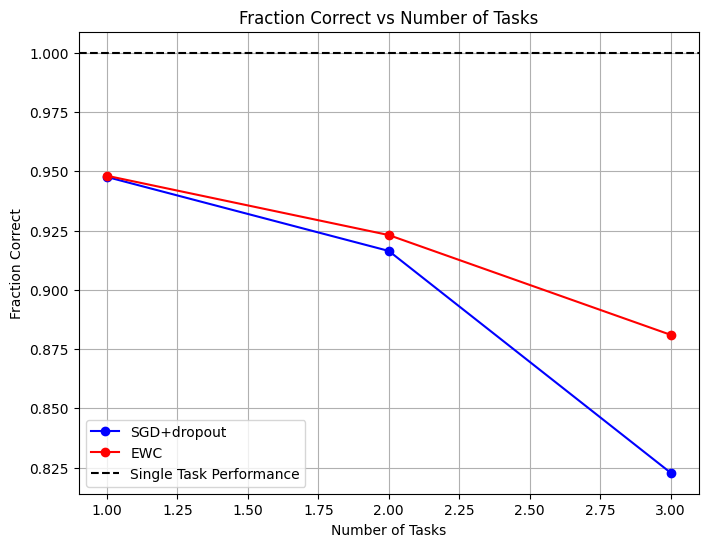

(None, None)

In [3]:
#Run experiment 2B on permutated MNIST 

acc_sgd, acc_ewc = run_experiment_2B(permuted_train_loaders[0:3],permuted_test_loaders[0:3])

In [ ]:
#Plot results for experiment 2B on permutated MNIST

num_tasks = len(permuted_test_loaders[0:3])
plt.figure(figsize=(8, 6))
plt.plot(range(1, num_tasks + 1), acc_sgd, label='SGD+dropout', marker='o', color='blue')
plt.plot(range(1, num_tasks + 1), acc_ewc, label='EWC', marker='o', color='red')
plt.axhline(y=1.0, linestyle='--', color='black', label='Single Task Performance')
plt.xlabel('Number of Tasks')
plt.ylabel('Fraction Correct')
plt.legend()
plt.title('Fraction Correct vs Number of Tasks')
plt.grid(True)
plt.show()